Noms i NIU dels integrants:
  - **Nom:** David Morillo Massagué
  - **NIU:** 1666540
  - **Nom:** Adrià Muro Gómez
  - **NIU:** 1665191
  - **Nom:** Lucia Garrido Rosas
  - **NIU:** 1671463

## Dataset utilitzat:

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset 

## Llibreries utilitzades

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from metrics_module import metrics
from dataloader_module import load_data
from graphs_module import plot_roc_auc
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

## Càrrega i pre-processament de les dades

In [20]:
datafile = "data/healthcare-dataset-stroke-data.csv"

X, y = load_data(datafile)
#X.drop(columns=["age"], inplace=True)
print(f"X shape: {X.shape}, y shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X shape: (4908, 18), y shape: (4908,)


## Creació i test de la regressió logística

Accuracy: 0.7536
Precision: 0.1588
Recall: 0.8302
F1 Score: 0.2667


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


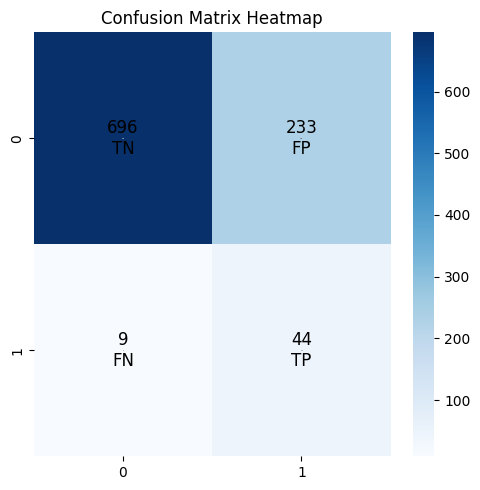

In [21]:
clf = LogisticRegression(max_iter=1000,class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)

## ROC Curve i AUC

c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


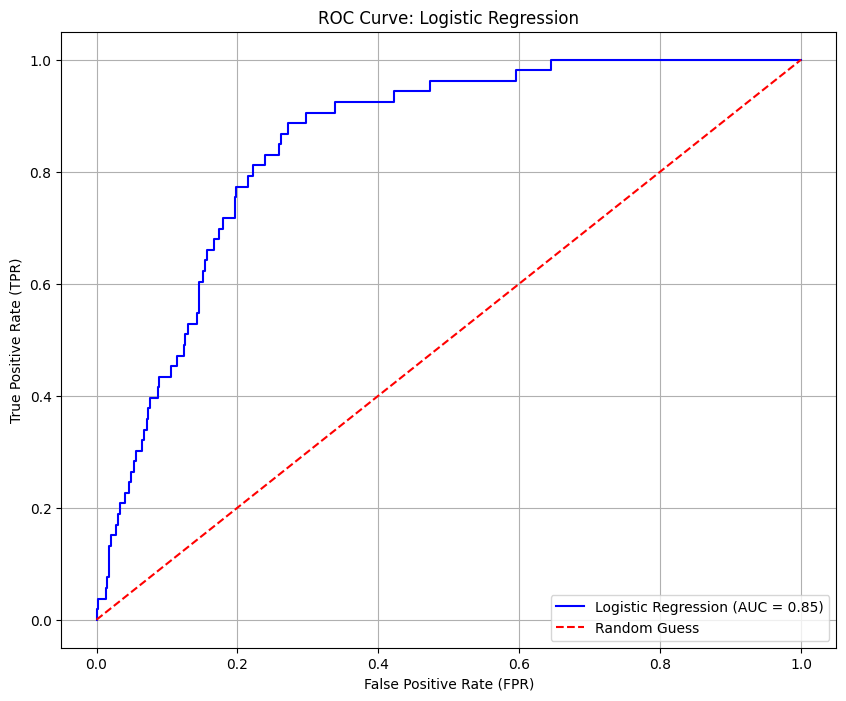

Logistic Regression AUC Score: 0.85


In [22]:
plot_roc_auc(clf, X_train, y_train, X_test, y_test, model_name="Logistic Regression")

## Visualització dels factors més importants pel model

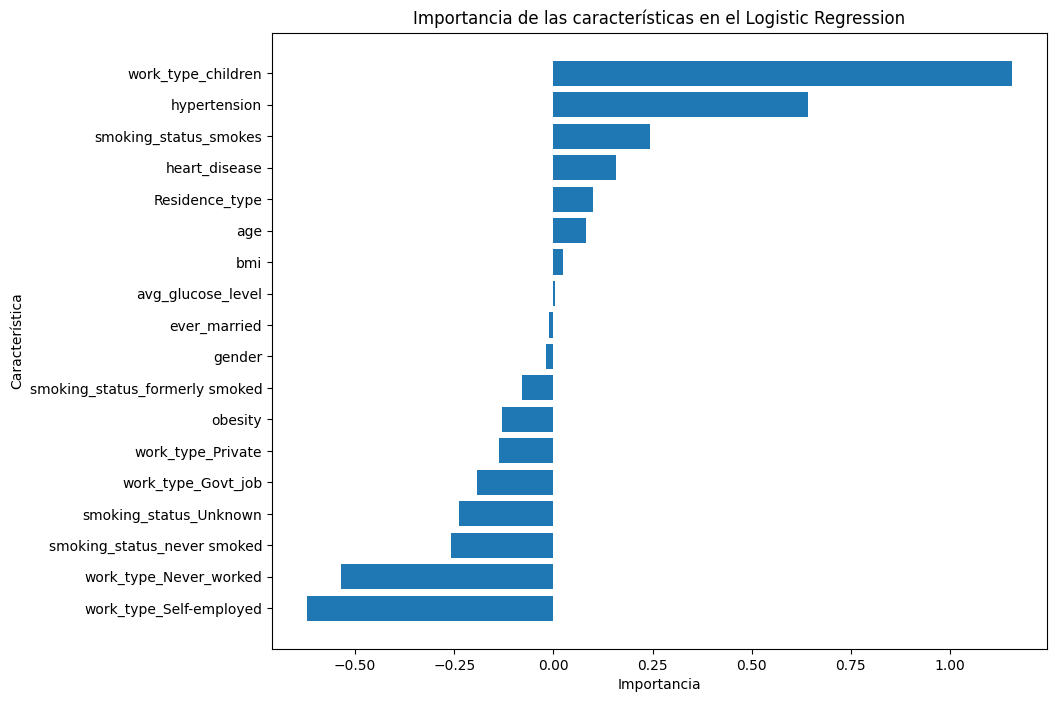

In [23]:
feature_importances = clf.coef_[0]

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características en el Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

# compute importances
model_fi = permutation_importance(clf, X, y)
model_fi['importances_mean']

# create a dataframe with feature importances
fi_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_fi['importances_mean']
})

# sort the dataframe by importance
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# print the sorted feature importances
for index, row in fi_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")

age: 0.058516707416462956
work_type_children: 0.02844335778321112
work_type_Govt_job: 0.004360228198859039
work_type_Self-employed: 0.004319478402608046
obesity: 0.00211898940505304
work_type_Private: 0.001955990220048931
smoking_status_never smoked: 0.0015892420537897633
ever_married: 0.0005297473512632988
Residence_type: 0.00040749796251020597
smoking_status_formerly smoked: 0.00032599837000817365
heart_disease: -0.0002037489812550586
hypertension: -0.0002852485737570909
gender: -0.00032599837000812926
work_type_Never_worked: -0.00040749796251016157
smoking_status_smokes: -0.0009779951100244099
avg_glucose_level: -0.003667481662591654
smoking_status_Unknown: -0.003911980440097751
bmi: -0.00986145069274651


## Eliminació d'alguns factors

Prova per a evaluar si es poden generar prediccions sense dades mèdiques, més accessibles per a la població general.

Accuracy: 0.9460
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


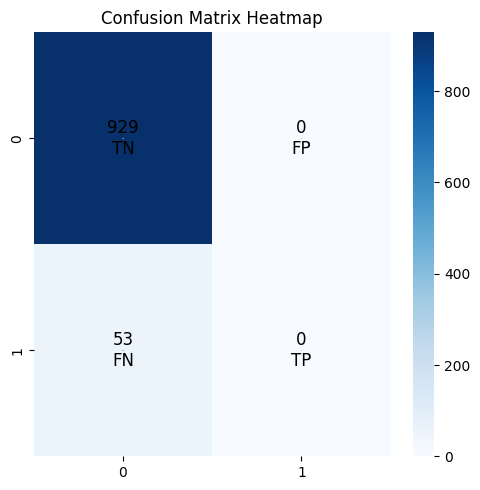

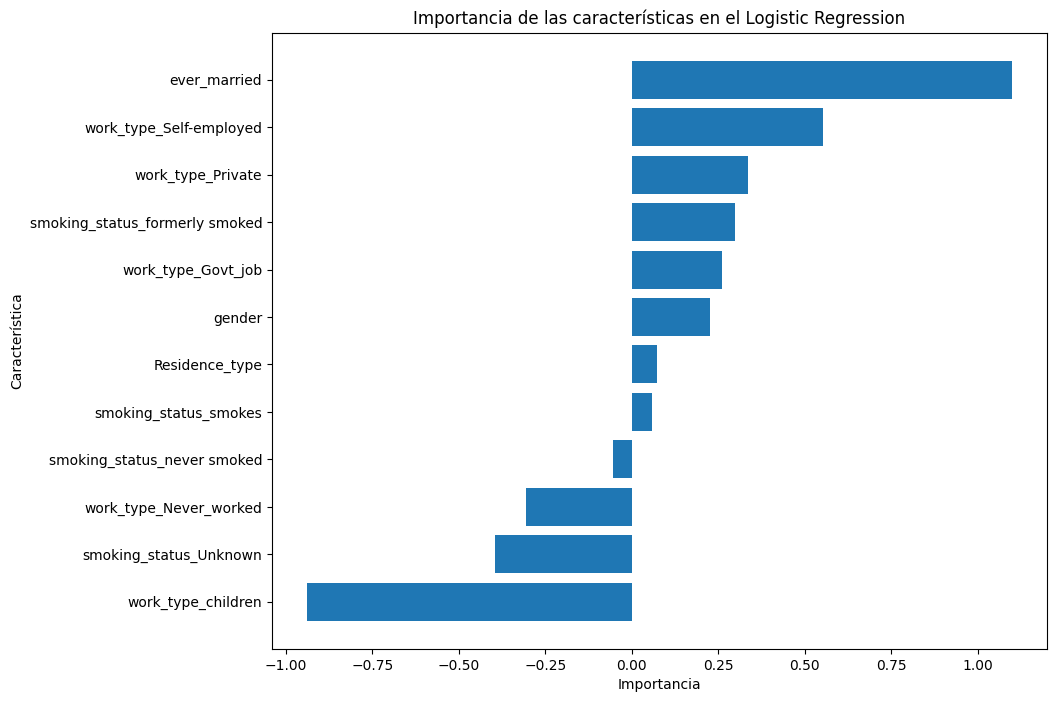

In [25]:
X = X.drop(columns=["hypertension", "heart_disease", "avg_glucose_level", "age", "bmi", "obesity"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)

feature_importances = clf.coef_[0]

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características en el Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

## ROC Curve i AUC

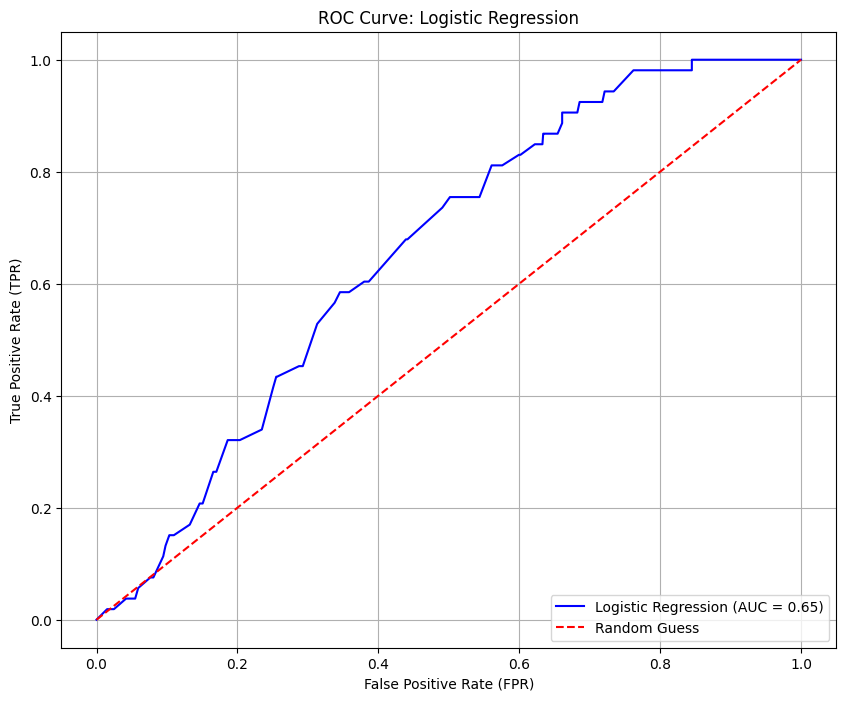

Logistic Regression AUC Score: 0.65


In [26]:
plot_roc_auc(clf, X_train, y_train, X_test, y_test, model_name="Logistic Regression")